In [7]:
import trimesh, random
from tqdm.notebook import tqdm
import numpy as np
import fs.osfs
import fs.zipfs
import fs.path
import glob
import pathlib

In [8]:
import matplotlib.pyplot as plt
def display_stats(a, title):
    _ = plt.hist(np.minimum(a, 64), bins="auto")  # arguments are passed to np.histogram
    plt.title(title)
    # plt.xlabel("Collision mesh count")
    # plt.ylabel("# objects with this collision mesh count")
    plt.show()
    print("Median", np.median(a))
    print("Mean", np.mean(a))
    print("Std", np.std(a))
    print("Max", np.max(a))
    print("Min", np.min(a))

In [9]:
# dataset = fs.zipfs.ZipFS(r"D:\BEHAVIOR-1K\asset_pipeline\artifacts\og_dataset.zip")
# dataset = fs.zipfs.ZipFS(r"D:\BEHAVIOR-1K\asset_pipeline\artifacts\parallels\vertex_reduction.zip")
dataset = fs.osfs.OSFS(r"D:\BEHAVIOR-1K\asset_pipeline\artifacts\aggregate")

In [11]:
collision_objs = [x.path for x in dataset.glob(r"objects/*/*/shape/collision/*.obj")]
# collision_objs = glob.glob(r"D:\BEHAVIOR-1K\asset_pipeline\artifacts\aggregate\objects\*\*\shape\collision\*.obj")
# collision_objs = glob.glob(r"C:\Users\Cem\Downloads\redux\*\*\shape\collision\*.obj")
print(len(collision_objs))
random.shuffle(collision_objs)

2491


## Count Collision Hulls

In [17]:
import io
import trimesh

# Count the number of o-directives in each
o_directives = {}
failed = []
for p in tqdm(collision_objs):
    parts = fs.path.parts(p)
    target = parts[-5] + "-" + parts[-4]
    
    with dataset.open(p, "rb") as f:
        bio = io.BytesIO(f.read())
        
    m = trimesh.load(bio, file_type="obj", force="mesh", skip_material=True)
    submeshes = m.split(only_watertight=False)
    for s in submeshes:
        try:
            trimesh.convex.convex_hull(s)
        except:
            failed.append(target)
        
    # for submesh in submeshes:
    #     if len(submesh.vertices) > 60:
    #         print(p, "has mesh with", len(submesh.vertices), "vertices")
    #         failed.append(target)
    o_directives[target] = len(submeshes)

  0%|          | 0/2491 [00:00<?, ?it/s]

unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Mate

specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!


specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object

specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Mate

specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  

specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  

specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Mate

specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Mate

specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object

specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  

specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  

specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Mate

specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Mate

specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  

specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneTy

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Mate

specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\sit

specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  

unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Mate

specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified materi

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  

specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(re

specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  no

specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  

specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  

specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\sit

specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  

specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib

specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Mate

specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Mate

specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Mate

specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, 

specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_k

specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, 

specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  

unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Mate

specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  

specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Mat

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to 

specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  

specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Mate

specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  

specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  

specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Mate

specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Mate

specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  

specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Mate

specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_k

specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  

specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Mate

unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Mate

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Mate

specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Mate

specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  

specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Mate

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Mate

specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  

specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\sit

unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Mate

specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material02

specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  

specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = pa

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last

specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, 

specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Mate

specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Mate

specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Mate

specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  

specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: dec

specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified mate

specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Mate

specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  F

specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Mate

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loade

specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Mate

unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Mate

specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all ze

specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, igno

specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  

specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, 

specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Mate

specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Mate

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loa

specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified mate

specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Mate

specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Mate

specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_no

specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  

specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Mat

specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  

specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Mate

specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call 

specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Mate

specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  

specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Mate

specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  

specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Mate

specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  F

specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Mate

specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: dec

specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  

specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  

specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", 

specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  

specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Mate

specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  

specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Mate

specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(re

specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  

specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Mate

specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(re

specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  

specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Mate

specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  

specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\sit

specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\t

specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Mate

specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  

unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Mate

specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  F

specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Mate

specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  

specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  

specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  

specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(re

specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subs

specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\e

specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Mate

specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_

specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  

specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Mate

specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Mate

specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  

specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Mate

specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  

specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material02

specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
f

specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  

specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  

specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Mate

specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Mate

specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mt

specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  

specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneTy

specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Mate

specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified mate

specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, 

specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  

specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-

specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Mate

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  not loaded!
specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Mate

specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Material006)  not loaded!
specified material (Material005)  not loaded!
specified material (Material004)  not loaded!
specified material (Material003)  not loaded!
specified material (Material002)  

unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Mate

specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Mate

unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Material016)  not loaded!
specified material (Material015)  not loaded!
specified material (Material014)  not loaded!
specified material (Material013)  not loaded!
specified material (Material012)  not loaded!
specified material (Material011)  not loaded!
specified material (Material010)  not loaded!
specified material (Material009)  not loaded!
specified material (Material008)  not loaded!
specified material (Material007)  not loaded!
specified material (Mate

specified material (Material001)  not loaded!
specified material (Material000)  not loaded!
unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Mate

In [19]:
print(set(failed))

{'microwave-bfbeeb', 'walls-qisxmx', 'ceilings-rujues', 'sugar_jar-bholak', 'bottom_cabinet_no_top-bmsclc', 'walls-qepoqs', 'bottom_cabinet-ttmejh', 'stool-sghekm', 'bed-rhanfx', 'bottom_cabinet-hnxyev', 'walls-xkdbsb', 'walls-xtqexq', 'floors-sfyruj', 'top_cabinet-zjtaus', 'ceilings-yhafaa', 'walls-dmjwhh', 'walls-dondsu', 'floors-kqgjaj', 'floor_lamp-lqdmym', 'range_hood-ylsdmp', 'walls-wzauoy', 'bottom_cabinet_no_top-motill', 'walls-fteroj', 'ceilings-hkpbtx', 'bottom_cabinet-slgzfc', 'walls-eugiyg', 'walker-txpihh', 'vinegar-snzyfk', 'walls-iqbzlu', 'walls-smskuw', 'crumb-irhmll', 'walls-ziijka', 'door-nfrbch', 'stove-qbjiva', 'walls-lwkmsr', 'table_lamp-zpqejt', 'dishwasher-tnlzww', 'bottom_cabinet-mbmbpa', 'modem-axqxsv', 'ceilings-rnaypg', 'bottom_cabinet-kxushk', 'coffee_table-gcollb', 'walls-rvvbvi', 'walls-kabquv', 'dryer-xsuyua', 'walls-cesukw', 'bottom_cabinet-ncbfwr', 'walls-yjbruo', 'top_cabinet-nkrgez', 'walls-ycxnon', 'dinner_napkin-rpccls', 'walls-zoonsb', 'bottom_cabi

In [9]:
for k, v in o_directives.items():
    if v > 100:
        print(k, "has", v, "hulls")

oven-tllnvs has 148 hulls


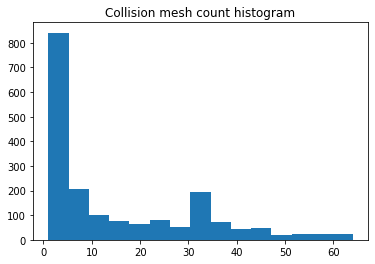

Median 7.0
Mean 15.067451820128479
Std 16.373215139999168
Max 148
Min 1


In [10]:
a = np.array(list(o_directives.values()))
display_stats(a, "Collision mesh count histogram")

## Analyze bounding box volumes

In [11]:
col_vols = {}
vis_vols = {}
bb_volume_ratios = {}
bb_max_nonzero_dim_ratios = {}
filtered_objs = collision_objs  # [x for x in collision_objs if "floors" in x]
watertight = 0
for col_name in tqdm(filtered_objs):
    col_name = pathlib.Path(col_name)
    target = col_name.parts[-5] + "-" + col_name.parts[-4]
    vis_name = pathlib.Path(str(col_name).replace("collision", "visual"))
    col_mesh = trimesh.load(col_name, force="mesh", skip_material=True)
    vis_mesh = trimesh.load(vis_name, force="mesh", skip_material=True, merge_tex=True, merge_norm=True)
    if vis_mesh.is_volume:
        watertight += 1
    
    col_bb = col_mesh.bounding_box.extents
    vis_bb = vis_mesh.bounding_box.extents
    
    col_vol = np.product(col_bb)
    vis_vol = np.product(vis_bb)
    
    col_vols[target] = col_vol
    vis_vols[target] = vis_vol
    bb_volume_ratios[target] = col_vol / vis_vol
    
    dim_ratio = col_bb / vis_bb
    invalid_dims = np.isclose(vis_bb, 0, atol=1e-3)
    if np.all(invalid_dims):
        print(f"Error: {target} bb's all dimensions are close to zero, can't include it:", vis_bb)
        continue
    elif np.any(invalid_dims):
        print(f"Warning: {target} bb has dimension close to zero:", vis_bb)
    bb_max_nonzero_dim_ratios[target] = np.max(dim_ratio[~invalid_dims])

  0%|          | 0/2491 [00:00<?, ?it/s]

ValueError: string is not a file: D:\objects\coffee_table\elhvfw\shape\collision\coffee_table-elhvfw-link_3.obj

In [ ]:
print("Total", len(filtered_objs))
print("Watertight", watertight)
print("Ratio", watertight / len(filtered_objs))

In [ ]:
a = np.array(list(col_vols.values()))
display_stats(np.log(a), "Collision bounding box volume histogram")

In [ ]:
a = np.array(list(vis_vols.values()))
display_stats(np.log(a), "Visual bounding box volume histogram")

In [ ]:
a = np.array(list(bb_volume_ratios.values()))
display_stats(a, "Collision-to-visual bounding box volume ratio histogram")

In [ ]:
a = np.array(list(bb_max_nonzero_dim_ratios.values()))
display_stats(a, "Maximum collision-to-visual bounding box non-zero dimension ratio histogram")

## Objects with too many links

In [ ]:
import sys
sys.path.append(r"D:\BEHAVIOR-1K\asset_pipeline")
from b1k_pipeline.utils import get_targets, PIPELINE_ROOT, parse_name

In [ ]:
import json
from collections import defaultdict
# Count the number of objects with non-tagged fixed links
link_cnts = {}
for target in tqdm.tqdm(get_targets("combined")):
    obj_list_file = PIPELINE_ROOT / "cad" / target / "artifacts" / "object_list.json"
    assert obj_list_file.exists(), "Missing obj list file " + str(obj_list_file)
    with open(obj_list_file, "r") as f:
        data = json.load(f)
        meshes = data["meshes"]
        parsed = [parse_name(x) for x in meshes]
        obj_link_cnts = defaultdict(set)
        for p in parsed:
            if not p.group("link_name") or p.group("link_name") == "base_link":
                continue
            if p.group("bad"):
                continue
            obj_name = p.group("obj_basename")
            link_name = p.group("link_basename")
            # Don't count openable links
            if p.group("tag") and "openable" in p.group("tag"):
                continue
            obj_link_cnts[obj_name].add(link_name)
        # fixed = sum(1 for x in parsed if x is not None and x.group("joint_type") == "F" and not x.group("tag"))
        link_cnts.update({x: len(y) for x, y in obj_link_cnts.items()})

In [ ]:
interesting = np.asarray(list(link_cnts.values()), dtype=int)
interesting = interesting[interesting>3]
display_stats(a, "Collision-to-visual bounding box volume ratio histogram")

In [ ]:
print("\n".join(str(x) for x in sorted(link_cnts.items(), key=lambda x: -x[1])))

In [ ]:
m = trimesh.load(r"C:\Users\Cem\Downloads\test-fridge\alarm-dkwmmf-base_link.obj", force="mesh", skip_material=True, merge_tex=True, merge_norm=True)

In [ ]:
len(m.split())